In [8]:
%matplotlib inline

In [110]:
from scipy.stats import dirichlet
from scipy.stats import beta
from scipy.stats import invgamma
from scipy.stats import norm
from scipy.misc import comb
from scipy.stats import multivariate_normal as mnorm
from scipy.special import expit
from scipy.stats import poisson
import statsmodels.api as sm

Problem 3.2

Probability of shift towards Bush:
0.1994


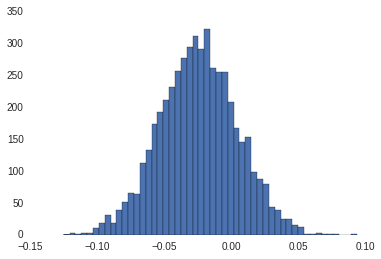

In [47]:
# method 1
before_post = dirichlet([295, 308, 39])
after_post = dirichlet([289, 333, 20])
before_samples = before_post.rvs(5000)
after_samples = after_post.rvs(5000)
before_proportion = np.array([x[0] / (x[0] + x[1]) for x in before_samples])
after_proportion = np.array([x[0] / (x[0] + x[1]) for x in after_samples])
res = after_proportion - before_proportion
plt.hist(res, bins = 50)
print 'Probability of shift towards Bush:'
print sum(res > 0) / 5000.

Probability of shift towards Bush:
0.2


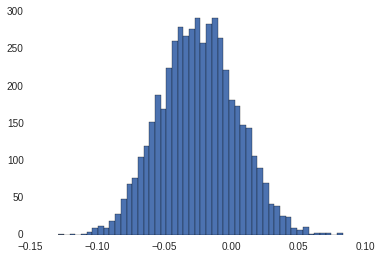

In [48]:
# method 2
before_post = beta(295, 308)
after_post = beta(289, 333)
before_samples = before_post.rvs(5000)
after_samples = after_post.rvs(5000)
res = after_samples - before_samples
plt.hist(res, bins = 50)
print 'Probability of shift towards Bush:'
print sum(res > 0) / 5000.

Problem 3.3

In [40]:
control_sig2 = invgamma(a = 31*.5, scale = 31*.5*.24**2)
control_sig2_samples = control_sig2.rvs(5000)
control_mu = np.zeros(5000)
for i in range(5000):
    control_mu[i] = norm(loc = 1.013, scale = (control_sig2_samples[i] / 32.)**.5).rvs(1)[0]
    
test_sig2 = invgamma(a = 35*.5, scale = 35*.5*.20**2)
test_sig2_samples = test_sig2.rvs(5000)
test_mu = np.zeros(5000)
for i in range(5000):
    test_mu[i] = norm(loc = 1.173, scale = (test_sig2_samples[i] / 36.)**.5).rvs(1)[0]

(array([   2.,    1.,    3.,    0.,    2.,    1.,    3.,    2.,    7.,
          21.,   12.,   25.,   29.,   47.,   58.,   89.,  110.,  152.,
         181.,  213.,  228.,  259.,  302.,  303.,  343.,  351.,  317.,
         313.,  285.,  240.,  249.,  186.,  171.,  137.,   82.,   76.,
          46.,   52.,   35.,   29.,   15.,    6.,    7.,    1.,    4.,
           3.,    1.,    0.,    0.,    1.]),
 array([ 0.83018686,  0.83745713,  0.84472741,  0.85199768,  0.85926795,
         0.86653822,  0.87380849,  0.88107876,  0.88834903,  0.8956193 ,
         0.90288957,  0.91015984,  0.91743011,  0.92470038,  0.93197065,
         0.93924092,  0.94651119,  0.95378146,  0.96105173,  0.968322  ,
         0.97559227,  0.98286255,  0.99013282,  0.99740309,  1.00467336,
         1.01194363,  1.0192139 ,  1.02648417,  1.03375444,  1.04102471,
         1.04829498,  1.05556525,  1.06283552,  1.07010579,  1.07737606,
         1.08464633,  1.0919166 ,  1.09918687,  1.10645714,  1.11372741,
         1.12099

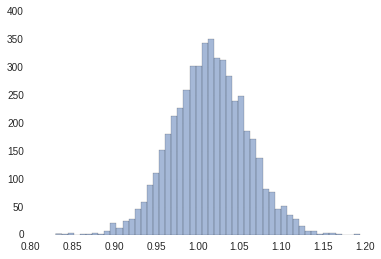

In [41]:
plt.hist(control_mu, bins = 50, alpha = .5)

(array([   3.,    0.,    2.,    3.,    6.,    7.,   17.,   18.,   21.,
          20.,   42.,   39.,   70.,   86.,  110.,  140.,  174.,  190.,
         216.,  252.,  264.,  286.,  299.,  295.,  262.,  289.,  296.,
         249.,  252.,  198.,  183.,  136.,  127.,  110.,   85.,   53.,
          50.,   42.,   31.,   18.,   19.,   10.,    8.,    7.,    4.,
           3.,    5.,    0.,    0.,    3.]),
 array([ 1.05363701,  1.05867996,  1.0637229 ,  1.06876585,  1.07380879,
         1.07885173,  1.08389468,  1.08893762,  1.09398057,  1.09902351,
         1.10406646,  1.1091094 ,  1.11415235,  1.11919529,  1.12423824,
         1.12928118,  1.13432412,  1.13936707,  1.14441001,  1.14945296,
         1.1544959 ,  1.15953885,  1.16458179,  1.16962474,  1.17466768,
         1.17971063,  1.18475357,  1.18979651,  1.19483946,  1.1998824 ,
         1.20492535,  1.20996829,  1.21501124,  1.22005418,  1.22509713,
         1.23014007,  1.23518302,  1.24022596,  1.2452689 ,  1.25031185,
         1.25535

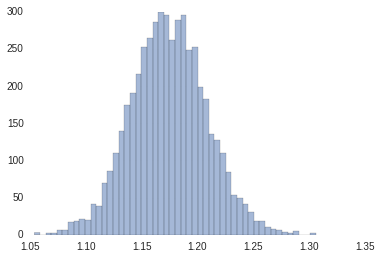

In [42]:
plt.hist(test_mu, bins = 50, alpha = .5)

(array([   2.,    1.,    2.,    1.,    3.,    6.,   12.,   35.,   29.,
          39.,   43.,   72.,   99.,  137.,  161.,  201.,  254.,  271.,
         283.,  311.,  346.,  340.,  342.,  292.,  304.,  295.,  213.,
         221.,  160.,  130.,   92.,   92.,   83.,   31.,   39.,   19.,
          15.,    6.,    2.,    4.,    7.,    4.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.]),
 array([-0.0436756 , -0.03425306, -0.02483053, -0.015408  , -0.00598546,
         0.00343707,  0.0128596 ,  0.02228213,  0.03170467,  0.0411272 ,
         0.05054973,  0.05997227,  0.0693948 ,  0.07881733,  0.08823986,
         0.0976624 ,  0.10708493,  0.11650746,  0.12593   ,  0.13535253,
         0.14477506,  0.15419759,  0.16362013,  0.17304266,  0.18246519,
         0.19188773,  0.20131026,  0.21073279,  0.22015532,  0.22957786,
         0.23900039,  0.24842292,  0.25784546,  0.26726799,  0.27669052,
         0.28611305,  0.29553559,  0.30495812,  0.31438065,  0.32380319,
         0.33322

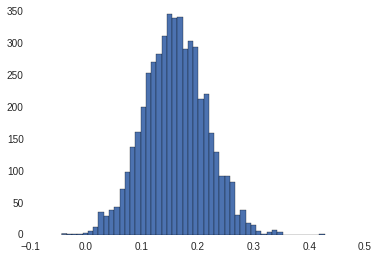

In [43]:
plt.hist(test_mu - control_mu, bins = 50)

In [46]:
print '95% CI for mu_t - mu_c:'
np.percentile(test_mu - control_mu, [2.5, 97.5])

95% CI for mu_t - mu_c:


array([ 0.04797583,  0.26826637])

Problem 3.4

In [7]:
def p34(prior_al, prior_be, samples = 5000):
    a, b = prior_al, prior_be
    post_p0 = beta(a + 39, b + 674 - 39)
    post_p1 = beta(a + 22, b + 680 - 22)
    post_p0_samples = post_p0.rvs(size = 1000)
    post_p1_samples = post_p1.rvs(size = 1000)
    
    plt.title('Posterior density of treatment (red) and control death rates.')
    plt.hist(post_p0_samples, bins = 50, color = 'blue', alpha = .5)
    plt.hist(post_p1_samples, bins = 50, color = 'red', alpha = .5)
    plt.show()
    plt.close()
    
    post_odds = (post_p1_samples / ( 1- post_p1_samples)) / (post_p0_samples / (1 - post_p0_samples))
    plt.title('Posterior density of odds ratio.')
    plt.hist(post_odds, bins = 50, color = 'green')
    

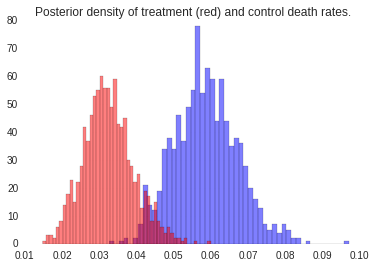

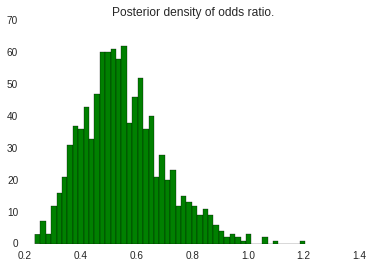

In [8]:
p34(0, 0)

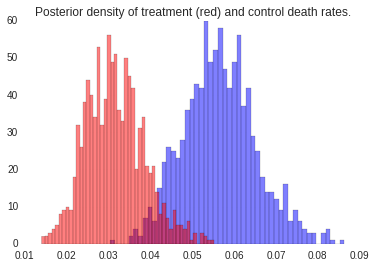

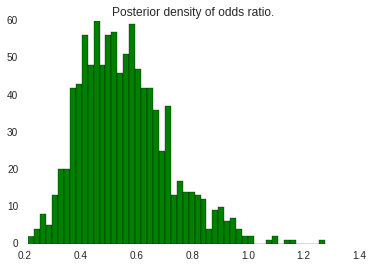

In [9]:
p34(-.5, .5)

Problem 3.5

In [ ]:
# fuck this seems still messed up but not working on it anymore

In [146]:
# measurements
data = np.array([10, 10, 12, 11, 9])

ndata = float(len(data))
dmean, ds2 = data.mean(), data.var()

post_sig2 = invgamma(a = (ndata-1)*.5, scale = ds2 * (ndata-1) * .5)
def post_mu(sig2, dmean = dmean, ndata = ndata):
    return norm(loc = dmean, scale = (sig2 / ndata)**.5)

In [147]:
post_sig2_samples = post_sig2.rvs(5000)
post_mu_samples = np.zeros(5000)
for i in range(5000):
    post_mu_samples[i] = post_mu(post_sig2_samples[i]).rvs(1)[0]

(-0.4, 5)

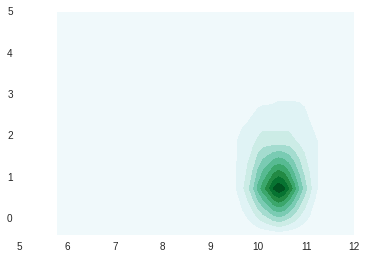

In [153]:
sns.kdeplot(post_mu_samples, post_sig2_samples, shade = True)
plt.xlim((5, 12))
plt.ylim((-.4,5))

In [154]:
print 'Posterior Mean, standard deviation of mean:'
print post_mu_samples.mean(), post_mu_samples.std()
print 'Posterior Mean, standard deviation of variance:'
print post_sig2_samples.mean(), post_sig2_samples.std()

Posterior Mean, standard deviation of mean:
10.4167516037 0.656089517725
Posterior Mean, standard deviation of variance:
2.09955170568 3.88862489294


In [156]:
#b now assuming that the data comes from a rounding
xgr, ygr = np.arange(9.,12.,.02), np.arange(.1, 5, .1)
xv, yv = np.meshgrid(xgr, ygr)

In [157]:
def prior(x, y):
    return 1. / y
def lhood_oneobs(d, x, y):
    underlying = norm(loc = x, scale = y**.5)
    return underlying.cdf(d +.5) - underlying.cdf(d - .5)
def lhood(d_arr, x, y):   
    d_lhood = map(lambda ipt: lhood_oneobs(ipt, x, y), d_arr)
    d_lhood = np.exp(sum(np.log(d_lhood)))
    return d_lhood

In [159]:
post_grid = np.zeros((len(ygr),len(xgr)))
for i in range(len(ygr)):
    for j in range(len(xgr)):
        post_grid[i,j] = prior(xv[i,j], yv[i,j]) * lhood(data, xv[i,j], yv[i,j])

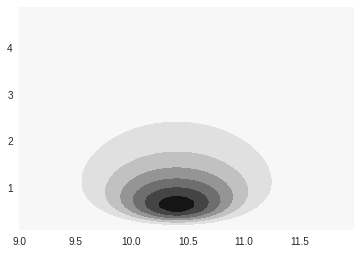

In [160]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
C = ax1.contourf(xv, yv, post_grid)

In [162]:
print 'Posterior mean, standard deviation of mean:'
pmm = (xv * post_grid).sum() / post_grid.sum()
pms = (((xv - pmm)**2 * post_grid).sum() / post_grid.sum())**.5
print pmm, pms
print 'Posterior mean, standard deviation of variance:'
psm =  (yv * post_grid).sum() / post_grid.sum()
pss = (((yv - psm)**2 * post_grid).sum() / post_grid.sum())**.5
print psm, pss

Posterior mean, standard deviation of mean:
10.4086726935 0.526036481652
Posterior mean, standard deviation of variance:
1.56290869742 1.01616752932


Problem 3.6

In [8]:
#b 
dat = np.array([53, 57, 66, 67, 72])
def lhood(y, N, theta):
    return comb(N, y) * theta**y * (1 - theta)**(N-y)
def plhood(arr, N, theta):
    lhoods = map(lambda x: lhood(x, N, theta), arr)
    return np.exp(sum(map(np.log, lhoods)))

xgr, ygr = np.arange(73, 300), np.arange(.01, .99, .01)
xv, yv = np.meshgrid(xgr, ygr)

In [11]:
post_grid = np.zeros((len(ygr), len(xgr)))
for i in range(len(ygr)):
    for j in range(len(xgr)):
        post_grid[i,j] = plhood(dat, xv[i,j], yv[i,j])

In [18]:
prob_gt_100 = np.sum(post_grid * (xv > 100)) / np.sum(post_grid)
print 'Probability that N > 100:'
print prob_gt_100

Probability that N > 100:
0.962225142481


Problem 3.8

In [1]:
data_yes_b, data_yes_v = [16, 9, 10, 13, 19, 20, 18, 17, 35, 55], [58, 90, 48, 57, 103, 57, 86, 112, 273, 64]
data_no_b, data_no_v = [12, 1, 2, 44, 9, 7, 9, 8], [113, 18, 14, 44, 208, 67, 29, 154]

In [5]:
beta_yes = beta(sum(data_yes_b), sum(data_yes_v))
beta_no = beta(sum(data_no_b), sum(data_no_v))
beta_yes_samples = beta_yes.rvs(1000)
beta_no_samples = beta_no.rvs(1000)

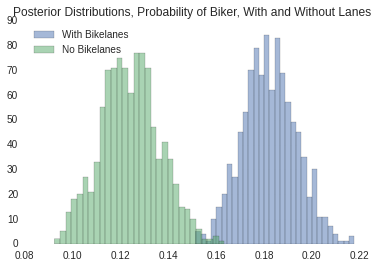

In [9]:
# beta distribution; but this does not make observations i.i.d.
plt.hist(beta_yes_samples, bins = 30, alpha = .5, label = 'With Bikelanes')
plt.hist(beta_no_samples, bins = 30, alpha = .5, label = 'No Bikelanes')
plt.title('Posterior Distributions, Probability of Biker, With and Without Lanes')
plt.legend(loc = 'best')

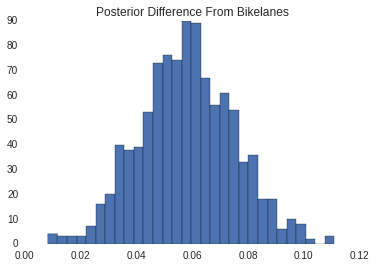

In [11]:
plt.hist(beta_yes_samples - beta_no_samples, bins = 30)
plt.title('Posterior Difference From Bikelanes')

Problem 3.11

In [66]:
pr = mnorm(mean=[0,10], cov=[[4., 10.], [10., 100.]]).pdf

In [67]:
data = pd.DataFrame({'dose': [-.86, -.3, -.05, .73], 'animals':[5,5,5,5], 'deaths':[0,1,3,5]})

In [90]:
contours = np.arange(.05, .96, .1)

In [68]:
def lhood(al, be, x_arr = data.dose, y_arr = data.deaths, n_arr = data.animals):
    
    inv = expit(al + be*x_arr)
    lhoods = inv**y_arr * (1 - inv)**(n_arr - y_arr)
    loglhoods = np.log(lhoods)
    tot_loglhood = loglhoods.sum()
    return np.exp(tot_loglhood)
    
    

In [81]:
algr, begr = np.arange(-5, 5, .1), np.arange(-15, 40, .2)
alv, bev = np.meshgrid(algr, begr)

In [82]:
post_grid = np.zeros((len(begr), len(algr)))
for i in range(len(begr)):
    for j in range(len(algr)):
        post_grid[i,j] = lhood(alv[i,j], bev[i,j])*pr((alv[i,j], bev[i,j]))

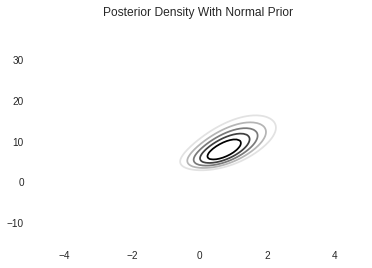

In [95]:
plt.contour(alv, bev, post_grid,)
plt.title('Posterior Density With Normal Prior')

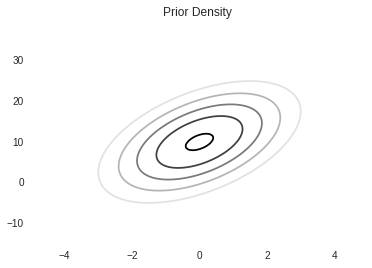

In [84]:
post_grid2 = np.zeros((len(begr), len(algr)))
for i in range(len(begr)):
    for j in range(len(algr)):
        post_grid2[i,j] = pr((alv[i,j], bev[i,j]))
plt.contour(alv, bev, post_grid2)
plt.title('Prior Density')

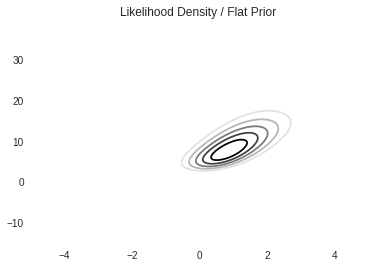

In [85]:
post_grid3 = np.zeros((len(begr), len(algr)))
for i in range(len(begr)):
    for j in range(len(algr)):
        post_grid3[i,j] = lhood(alv[i,j], bev[i,j])
plt.contour(alv, bev, post_grid3)
plt.title('Likelihood Density / Flat Prior')

Problem 3.12

In [105]:
#data
fatal_accidents = np.array([24, 25, 31, 31, 22, 21, 26, 20, 16, 22])
passenger_deaths = np.array([734, 516, 754, 877, 814, 362, 764, 809, 223, 1066])
death_rate = np.array([.19, .12, .15, .16, .14, .06, .13, .13, .03, .15])
years = range(len(fatal_accidents))

In [128]:
def plhood(al, be, acc_array = fatal_accidents, year_arr = years):
    
    def lhood(al, be, acc, year):
        rv = poisson(al + be * year)
        return rv.pmf(acc)
    
    lhoods = np.array([lhood(al, be, tup[0], tup[1]) for tup in zip(acc_array, year_arr)])
    lhoods = np.log(lhoods)
    lhood = lhoods.sum()
    return np.exp(lhood)

In [113]:
regressor = sm.add_constant(years, prepend = False)

In [115]:
model = sm.OLS(fatal_accidents, regressor)
res = model.fit()
res.summary()

/home/rkravitz/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     4.322
Date:                Mon, 25 May 2015   Prob (F-statistic):             0.0712
Time:                        08:59:19   Log-Likelihood:                -26.998
No. Observations:                  10   AIC:                             58.00
Df Residuals:                       8   BIC:                             58.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.9212      0.443     -2.079      0.071        -1.943     0.101
const         27.9455      2.366     11.813      0.000        22.490    33.400
==============================================================================
Omnibus:                        2.495   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                1.074
Skew:                           0.386   Prob(JB):                        0.585
Kurtosis:                       1.593   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
algr, begr = np.arange(20, 36, .2), np.arange(-4, 3, .1)
alv, bev = np.meshgrid(algr, begr)

In [136]:
post_grid = np.zeros((len(begr), len(algr)))
for i in range(len(begr)):
    for j in range(len(algr)):
        post_grid[i,j] = plhood(alv[i,j], bev[i,j])

In [143]:
post_grid = np.nan_to_num(post_grid)

In [151]:
post_grid /= post_grid.sum()

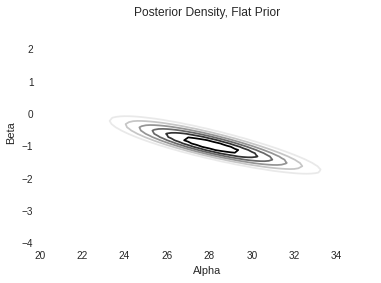

In [152]:
plt.contour(alv, bev, post_grid)
plt.title('Posterior Density, Flat Prior')
plt.xlabel('Alpha')
plt.ylabel('Beta')

In [159]:
idxs = np.random.choice(range(len(post_grid.ravel())), p = post_grid.ravel(), size = 1000)
samples = alv.ravel()[idxs] + 10 * bev.ravel()[idxs]

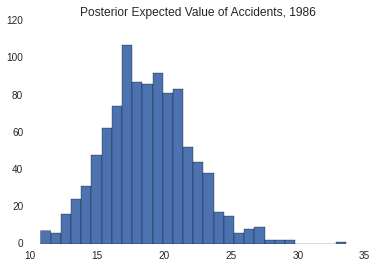

In [161]:
plt.hist(samples, bins = 30)
plt.title('Posterior Expected Value of Accidents, 1986')

95% CI For Predicted Accidents: 9.0 to 30.0


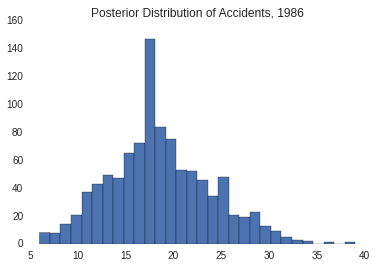

In [169]:
pred_samples = [poisson(m).rvs(1)[0] for m in samples]
quants = np.percentile(pred_samples, [2.5, 97.5])
print '95% CI For Predicted Accidents: {0} to {1}'.format(quants[0], quants[1])
plt.hist(pred_samples, bins = 30)
plt.title('Posterior Distribution of Accidents, 1986')